In [1]:
import os
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from xgboost import XGBClassifier

In [4]:
data = pd.read_csv('titanic.csv')

In [5]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
data = data[['Pclass', 'Sex', 'Age', 'Survived']]
data.head()

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [8]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [9]:
data.head()

,Pclass,Sex,Age,Survived
0,3,0,22.0,0
1,1,1,38.0,1
2,3,1,26.0,1
3,1,1,35.0,1
4,3,0,35.0,0


In [10]:
data = data.dropna()

In [11]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [23]:
model = XGBClassifier(n_estimators=1000, n_jobs=24)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=24, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [24]:
y_prediction = model.predict(X_test)

In [31]:
dt = pd.DataFrame([[1, 1, 30.0]], columns=['Pclass', 'Sex', 'Age'])
dt

,Pclass,Sex,Age
0,1,1,30.0


In [32]:
pred = model.predict(dt)
pred

array([1])

In [15]:
from sklearn.metrics import accuracy_score

In [25]:
f'Accuracy: {accuracy_score(y_test, y_prediction)}'

'Accuracy: 0.7552447552447552'

In [26]:
y_prediction

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1])

In [27]:
model.feature_importances_

array([0.26297477, 0.6438547 , 0.09317064], dtype=float32)

In [19]:
import matplotlib.pyplot as plt

<BarContainer object of 3 artists>

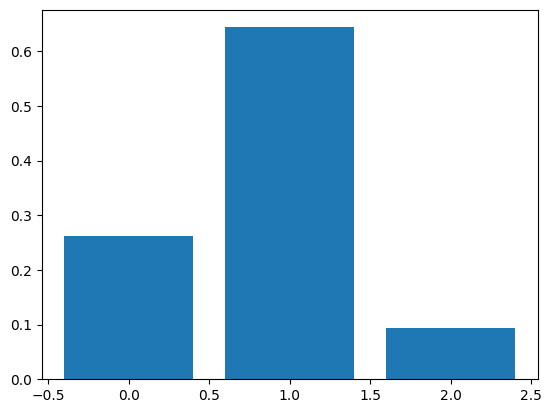

In [28]:
fig, ax = plt.subplots()
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)

In [33]:
import pickle

In [34]:
pickle.dump(model, open('xgb_classifier_titanic.pkl', 'wb'))

In [35]:
model_t = pickle.load(open('xgb_classifier_titanic.pkl', 'rb'))

In [36]:
p = model_t.predict(dt)
p

array([1])